In [54]:
%matplotlib inline 
import numpy as np
import pandas as pd 
import scipy as sp
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("darkgrid")

# Halo Mass Function 
We used the online HMF calculator to get the halo mass distribution at different redshift (website: http://hmf.icrar.org)

In here, we extract the data of halo mass function when $z = 0.5, 2, 4$. The data is shown as below. With the data of comoving number density of halo mass per unit mass and corresponding halo mass at certain redshift, we may use this information to calculate the total lensing cross-section. In here, we used Pandas to read the files which are downloaded in HMFcalc. 

In [55]:
# HMF when z_L = 0.5 
hmf_data_05= pd.read_csv("z_0.5.txt",skiprows=range(12), sep=' ',
            names=['m', 'sigma', 'ln(1/sigma)', 'n_eff', 'f(sigma)', 'dn/dm', 'dn/dlnm', 'dn/dlog10m', 'n(>m)',
                   'rho(>m)', 'rho(<m)', 'Lbox(N=1)'])
hmf_data_05.head(5)

,m,sigma,ln(1/sigma),n_eff,f(sigma),dn/dm,dn/dlnm,dn/dlog10m,n(>m),rho(>m),rho(<m),Lbox(N=1)
0,1.000000e+10,2.903846,-1.066036,-2.361242,0.282702,2.267824e-11,0.226782,0.522186,0.253648,3.060756e+10,4.474455e+10,1.579753
1,1.122018e+10,2.868340,-1.053733,-2.356394,0.284082,1.823927e-11,0.204648,0.471219,0.228813,3.034484e+10,4.500727e+10,1.634957
2,1.258925e+10,2.833002,-1.041337,-2.351506,0.285461,1.466887e-11,0.184670,0.425219,0.206402,3.007883e+10,4.527328e+10,1.692110
3,1.412538e+10,2.797834,-1.028845,-2.346530,0.286839,1.179799e-11,0.166651,0.383728,0.186179,2.980949e+10,4.554262e+10,1.751285
4,1.584893e+10,2.762837,-1.016258,-2.341474,0.288215,9.489288e-12,0.150395,0.346297,0.167928,2.953677e+10,4.581534e+10,1.812560


In [56]:
# HMF when z_L = 2
hmf_data_2= pd.read_csv("z_2.txt",skiprows=range(12), sep=' ',
            names=['m', 'sigma', 'ln(1/sigma)', 'n_eff', 'f(sigma)', 'dn/dm', 'dn/dlnm', 'dn/dlog10m', 'n(>m)',
                   'rho(>m)', 'rho(<m)', 'Lbox(N=1)'])
hmf_data_2.head(5)

,m,sigma,ln(1/sigma),n_eff,f(sigma),dn/dm,dn/dlnm,dn/dlog10m,n(>m),rho(>m),rho(<m),Lbox(N=1)
0,1.000000e+10,1.599086,-0.469432,-2.361242,0.319228,2.560831e-11,0.256083,0.589653,0.264203,1.676479e+10,5.858732e+10,1.558430
1,1.122018e+10,1.579533,-0.457129,-2.356394,0.318812,2.046909e-11,0.229667,0.528828,0.236241,1.646904e+10,5.888307e+10,1.617638
2,1.258925e+10,1.560073,-0.444733,-2.351506,0.318319,1.635734e-11,0.205927,0.474164,0.211166,1.617146e+10,5.918065e+10,1.679287
3,1.412538e+10,1.540707,-0.432241,-2.346530,0.317746,1.306924e-11,0.184608,0.425076,0.188686,1.587212e+10,5.947999e+10,1.743494
4,1.584893e+10,1.521435,-0.419654,-2.341474,0.317090,1.043997e-11,0.165462,0.380991,0.168534,1.557105e+10,5.978106e+10,1.810385


In [57]:
# HMF when z_L = 4 
hmf_data_4= pd.read_csv("z_4.txt",skiprows=range(12), sep=' ',
            names=['m', 'sigma', 'ln(1/sigma)', 'n_eff', 'f(sigma)', 'dn/dm', 'dn/dlnm', 'dn/dlog10m', 'n(>m)',
                   'rho(>m)', 'rho(<m)', 'Lbox(N=1)'])
hmf_data_4.head(5)

,m,sigma,ln(1/sigma),n_eff,f(sigma),dn/dm,dn/dlnm,dn/dlog10m,n(>m),rho(>m),rho(<m),Lbox(N=1)
0,1.000000e+10,0.972660,0.027720,-2.361242,0.232866,1.868039e-11,0.186804,0.430132,0.163338,5.954789e+09,6.939732e+10,1.829380
1,1.122018e+10,0.960767,0.040023,-2.356394,0.228843,1.469272e-11,0.164855,0.379593,0.143095,5.740779e+09,6.961133e+10,1.911870
2,1.258925e+10,0.948931,0.052420,-2.351506,0.224714,1.154727e-11,0.145372,0.334730,0.125237,5.528951e+09,6.982316e+10,1.998737
3,1.412538e+10,0.937151,0.064911,-2.346530,0.220478,9.068484e-12,0.128096,0.294951,0.109495,5.319443e+09,7.003267e+10,2.090267
4,1.584893e+10,0.925429,0.077498,-2.341474,0.216137,7.116163e-12,0.112784,0.259694,0.095629,5.112389e+09,7.023972e+10,2.186772


In [58]:
# Halo mass and its comoving number density per mass at z= 0.5
m_05 = hmf_data_05["m"]
dndm_05 = hmf_data_05["dn/dm"]

In [59]:
# Halo mass and its comoving number density per mass at z= 2
m_2 = hmf_data_2["m"]
dndm_2 = hmf_data_2["dn/dm"]

In [60]:
# Halo mass and its comoving number density per mass at z= 4
m_4 = hmf_data_4["m"]
dndm_4 = hmf_data_4["dn/dm"]

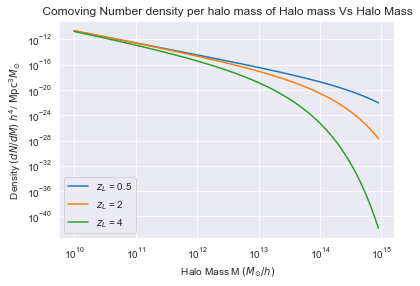

In [61]:
# plot dndm vs m
plt.title(r" Comoving Number density per halo mass of Halo mass Vs Halo Mass")
plt.ylabel(r" Density $ (dN/dM)$ $h^{4}$/ $\mathrm{Mpc}^{3} M_{\odot}$  ")
plt.xlabel(r" Halo Mass M $ (M_{\odot} /h) $")
plt.plot(m_05,dndm_05, label=r"$z_{L}$ = 0.5")
plt.plot(m_2,dndm_2, label=r"$z_{L}$ = 2")
plt.plot(m_4,dndm_4, label=r"$z_{L}$ = 4")
plt.xscale("log")
plt.yscale("log")
plt.legend()

# Total Lensing Cross-section of Source Plane 

The total lensing cross-section is the sum of number of available lens in at redshift z and its lensing cross-section of it. Therefore, from the Halo Mass function, we can calculate the comoving number density of haloes and mass distribution of haloes at certain redshift $z_{L}$. 

Recall the the lensing cross-section is defined as: 
\begin{equation}
\begin{split}
\sigma^{S}(> \mu_{0} = 10) &= 2 \pi  \theta_{E}^{2} \frac{(\mu_{0}^{2}+1)}{(\mu_{0}^{2} -1)^{2}} \\
&= \frac{8 \pi^{3} G^{2}}{c^{4}} \frac{(\mu_{0}^{2} + 1)^{2}}{(\mu_{0}^{2} -1 )^{4}} \Big( \frac{M}{r_{200}} \Big)^{2}  
\Big( \frac{d_{A}(z_{L},z_{S})}{d_{A}(Z_{s})} \Big)^{2}
\end{split}
\end{equation}

Then, the total cross-section per unit volume will be 

\begin{equation}
\sigma^{S}_{total} = \sum_{i} \frac{dn(M_{i},z)}{dM_{i}} \sigma^{S}(M_{i},z) * \Delta M_{i} 
\end{equation}

As the lensing and total lensing cross-section involve the maginification, in this case we assume the thershold of magnificarion is $\mu_{0} > 10$. The magnification of gravitational waves is given by its luminosity distance from distant places and the place we observed it ( in this case we choose $z_{obs}$ = 0.15). Hence, we can obtain the relation of $\mu_{GW}$ as follows:

\begin{equation}
\mu_{GW}(z)=  \Big( \frac{d_{L}(z)}{d_{L, \mu = 1(z_{obs} = 0.15)}} \Big)^{2}
\end{equation}

For instance, in order to reinterpret a source initially identified at $z \approx 0.1 $ as actually being at $z=1$ we requires
the maginification of g-waves $\mu_{GW} = 200$ ; To reinterpret sources initially identified at $z \approx 0.2$ as actually being at $z=1$ requires $\mu_{GW}$ ≃ 45.
As the total lensing cross section falls like $ \sigma_{tot} \propto \frac{1}{\mu^{4}}$, we can approximate it as follow: 

\begin{equation}
\sigma^{S}_{total} =  \frac{8 \pi^{3} G^{2}}{\mu_{GW}(z)^{4} c^{4}} \sum_{i} \frac{dn(M_{i},z_{L})}{dM_{i}} \Big( \frac{M(z_{L})}{r_{200}} \Big)^{2} * \Delta M_{i}  \Big( \frac{d_{A}(z_{L},z_{S})}{d_{A}(z_{s})} \Big)^{2}
\end{equation}

Therefore, without any calculation, we should expect that the lensing cross section suffers from a large suppresion when the maginification $\mu_{GW}$ is larger. That means we are less likely to observe gravitational waves from high redshift region as its required $\mu_{GW}$ is very big. 

In [62]:
# Astropy testing total lensing cross section 
import astropy 
from astropy.constants import c, G
from astropy.cosmology import FlatLambdaCDM, z_at_value
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70*u.km/u.s/u.Mpc, Om0=0.3)
H_0 = cosmo.H(0)

def Hubble(z): 
    return H_0*np.sqrt(0.3*(1+z)**3 + 0.7)

#Assume Virial mass
def r_200(m,z): 
    return (m*G/(100*Hubble(z)**2))**(1/3)

# Differential Mass
def dm(m):
    dM = np.append(np.array([0]),np.array([m[i+1]-m[i] for i in range(0,len(m)-1)]))
    return dM

# total lensing cross secion ( treat mu_{0} is constant )
def total_cross_sec(m,dndm,zl,zs):
    # append dm for correction 
    # append the constant in front of cross-section (28/4)
    cross_sec = (8*np.pi**3*G**2*c**-4)*dm(m)*dndm*(m/r_200(m=m,z=zl)*(cosmo.angular_diameter_distance_z1z2(zl,zs)/cosmo.angular_diameter_distance(zs)))**2
    return np.sum(np.asarray(cross_sec))


# Maginification of Gravotational waves 
def mu_gw(zs):
    # zs > 0.3 by computation
    return (cosmo.luminosity_distance(zs)/cosmo.luminosity_distance(0.1))**2 

# with magnification lensing cross-sec
def cs_source(m,dndm,zl,zs):
    return np.array([mu_gw(i)**-4*total_cross_sec(m,dndm,zl,i) for i in zs])

In [63]:
# Source of lensed Gws 
zs = 10

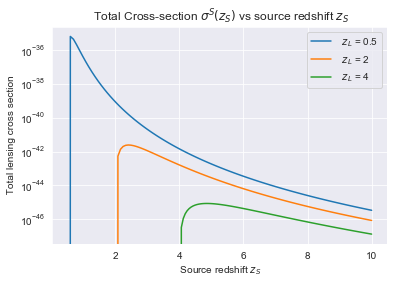

In [64]:
# Plot of total cross-section with magnification \mu_gw (no normalization)

# Plot of total lensing cross section with magnificaton  VS zs (zL = 2 )
plt.plot(np.linspace(0.5,zs,100), cs_source(m_05,dndm_05,0.5,np.linspace(0.5,zs,100)), label=r" $z_{L}$ = 0.5" )

# Plot of total lensing cross section with magnificaton  VS zs (zL = 2 )
plt.plot(np.linspace(2,zs,100),cs_source(m_2,dndm_2,2,np.linspace(2,zs,100)) , label=r" $z_{L}$ = 2")

#Plot of total lensing cross section with magnificaton VS zs (zL = 4 )
plt.plot(np.linspace(4,zs,100),cs_source(m_4,dndm_4,4,np.linspace(4,zs,100)) , label=r" $z_{L}$ = 4")


plt.title(r" Total Cross-section $\sigma^{S}(z_{S})$ vs source redshift $z_{S}$")
plt.ylabel(r" Total lensing cross section")
plt.xlabel(r" Source redshift $z_{S}$")

# log scale
plt.yscale("log")
plt.legend()
plt.savefig("cross_sec_source.pdf")

# Total Lensing Cross-section of Image Plane 

The total lensing cross-section is the sum of number of available lens in at redshift z and its lensing cross-section of it. Therefore, from the Halo Mass function, we can calculate the comoving number density of haloes and mass distribution of haloes at certain redshift $z_{L}$. 

Recall the the lensing cross-section is defined as: 
\begin{equation}
\begin{split}
\sigma^{I}(> \mu_{0} = 10) &= 4 \pi  \theta_{E}^{2} \frac{\mu_{0}^{3}}{(\mu_{0}^{2} -1)^{2}} \\
&= \frac{16 \pi^{3} G^{2}}{c^{4}} \frac{\mu_{0}^{6}}{(\mu_{0}^{2} -1 )^{4}} \Big( \frac{M}{r_{200}} \Big)^{2}  
\Big( \frac{d_{A}(z_{L},z_{S})}{d_{A}(Z_{s})} \Big)^{2}
\end{split}
\end{equation}

Then, the total cross-section per unit volume will be 

\begin{equation}
\sigma^{I}_{total} = \sum_{i} \frac{dn(M_{i},z)}{dM_{i}} \sigma^{S}(M_{i},z) * \Delta M_{i} 
\end{equation}

As the lensing and total lensing cross-section involve the maginification, in this case we assume the thershold of magnificarion is $\mu_{0} > 10$. The magnification of gravitational waves is given by its luminosity distance from distant places and the place we observed it ( in this case we choose $z_{obs}$ = 0.15). Hence, we can obtain the relation of $\mu_{GW}$ as follows:

\begin{equation}
\mu_{GW}(z)=  \Big( \frac{d_{L}(z)}{d_{L, \mu = 1(z_{obs} = 0.15)}} \Big)^{2}
\end{equation}

For instance, in order to reinterpret a source initially identified at $z \approx 0.1 $ as actually being at $z=1$ we requires
the maginification of g-waves $\mu_{GW} = 200$ ; To reinterpret sources initially identified at $z \approx 0.2$ as actually being at $z=1$ requires $\mu_{GW}$ ≃ 45.
As the total lensing cross section falls like $ \sigma_{tot} \propto \frac{1}{\mu^{2}}$, we can approximate it as follow: 

\begin{equation}
\sigma^{I}_{total} =  \frac{16 pi^{3} G^{2}}{\mu_{GW}(z)^{2}c^{4}} \sum_{i} \frac{dn(M_{i},z_{L})}{dM_{i}} \Big( \frac{M(z_{L})}{r_{200}} \Big)^{2} * \Delta M_{i}  \Big( \frac{d_{A}(z_{L},z_{S})}{d_{A}(z_{s})} \Big)^{2}
\end{equation}

Therefore, without any calculation, we should expect that the lensing cross section suffers from a large suppresion when the maginification $\mu_{GW}$ is larger. That means we are less likely to observe gravitational waves from high redshift region as its required $\mu_{GW}$ is very big. 

In [65]:
# Total lensing cross-section of lmage plane 

def cs_image(m,dndm,zl,zs):
    return np.array([mu_gw(i)**-2*total_cross_sec(m,dndm,zl,i) for i in zs])



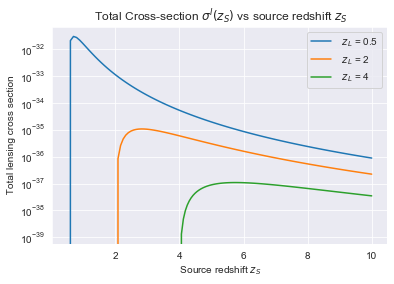

In [66]:
# Plot of total cross-section of image plane with magnification \mu_gw 

# Plot of total lensing cross section with magnificaton  VS zs (zL = 2 )
plt.plot(np.linspace(0.5,zs,100), cs_image(m_05,dndm_05,0.5,np.linspace(0.5,zs,100)), label=r" $z_{L}$ = 0.5" )

# Plot of total lensing cross section with magnificaton  VS zs (zL = 2 )
plt.plot(np.linspace(2,zs,100),cs_image(m_2,dndm_2,2,np.linspace(2,zs,100)) , label=r" $z_{L}$ = 2")

#Plot of total lensing cross section with magnificaton VS zs (zL = 4 )
plt.plot(np.linspace(4,zs,100),cs_image(m_4,dndm_4,4,np.linspace(4,zs,100)) , label=r" $z_{L}$ = 4")


plt.title(r" Total Cross-section $\sigma^{I}(z_{S})$ vs source redshift $z_{S}$")
plt.ylabel(r" Total lensing cross section")
plt.xlabel(r" Source redshift $z_{S}$")

# log scale
plt.yscale("log")
plt.legend()
plt.savefig("cross_sec_image.pdf")

# Maximum Lensing Cross-section and relevant source redshift

In [67]:
z_05_source = pd.DataFrame({"zs":np.linspace(0.5,zs,100), "sigma":cs_source(m_05,dndm_05,0.5,np.linspace(0.5,zs,100))})
z_2_source = pd.DataFrame({"zs":np.linspace(2,zs,100), "sigma":cs_source(m_2,dndm_2,2,np.linspace(2,zs,100))})
z_4_source = pd.DataFrame({"zs":np.linspace(4,zs,100), "sigma":cs_source(m_4,dndm_4,4,np.linspace(4,zs,100))})

In [68]:
z_05_image = pd.DataFrame({"zs":np.linspace(0.5,zs,100), "sigma":cs_image(m_05,dndm_05,0.5,np.linspace(0.5,zs,100))})
z_2_image = pd.DataFrame({"zs":np.linspace(2,zs,100), "sigma":cs_image(m_2,dndm_2,2,np.linspace(2,zs,100))})
z_4_image = pd.DataFrame({"zs":np.linspace(4,zs,100), "sigma":cs_image(m_4,dndm_4,4,np.linspace(4,zs,100))})

In [69]:
z_05_source 

,zs,sigma
0,0.500000,0.000000e+00
1,0.595960,6.229910e-36
2,0.691919,4.295362e-36
3,0.787879,2.076313e-36
4,0.883838,9.417904e-37
...,...,...
95,9.616162,4.888721e-46
96,9.712121,4.471480e-46
97,9.808081,4.093561e-46
98,9.904040,3.750916e-46


In [70]:
# The maximum cross section of image plane when z_{L} = 0.5
z_05_image[z_05_image["sigma"] == max(z_05_image["sigma"])] 

,zs,sigma
2,0.691919,2.976363e-32


In [71]:
# The maximum cross-section of image plane when z_{L} = 2
z_2_image[z_2_image["sigma"] == max(z_2_image["sigma"])]

,zs,sigma
10,2.808081,1.077832e-35


In [72]:
# The maximum cross-section of source plane when z_{L} = 4
z_4_image[z_4_image["sigma"] == max(z_4_image["sigma"])]

,zs,sigma
29,5.757576,1.094120e-37


In [73]:
# The maximum cross-section of source plane when z_{L} = 0.5 
z_05_source[z_05_source["sigma"] == max(z_05_source["sigma"])] 

,zs,sigma
1,0.59596,6.229910e-36


In [74]:
# The maximum cross-section of source plane when z_{L} = 2
z_2_source[z_2_source["sigma"] == max(z_2_source["sigma"])]

,zs,sigma
5,2.40404,2.454430e-42


In [75]:
# The maximum cross-section of source plane when z_{L} = 0.5 
z_4_source[z_4_source["sigma"] == max(z_4_source["sigma"])]

,zs,sigma
14,4.848485,8.698949e-46
